In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Data preprocessing

In [5]:
# lower case

In [6]:
df['Review']=df['Review'].str.lower()

In [7]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [8]:
# Removing punctuations

In [9]:
import string
string.punctuation
exclude=string.punctuation

In [10]:
def remove_punch(x):
    for i in exclude:
        x=x.replace(i,'')
    return x

In [11]:
df['Review']=df['Review'].apply(remove_punch)

In [12]:
# feature Extraction

In [13]:
# Apply TF-IDF vectorizer on preprocessed Data

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tf= TfidfVectorizer()
x=tf.fit_transform(df['Review']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 2067))

In [16]:
y=df['Liked']

In [17]:
# train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [19]:
xtrain.shape

(800, 2067)

In [20]:
# Build Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping


2025-02-03 08:05:58.530955: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 08:05:58.660774: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 08:05:58.737540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738569958.818502   12471 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738569958.865438   12471 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 08:05:59.118258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [24]:
model=Sequential()

In [25]:
# add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# create dense layer 1
model.add(Dense(units=128, activation='relu'))

# create dropout layer1 
model.add(Dropout(rate=0.5))

# create dense layer 2
model.add(Dense(units=64, activation='relu'))

# create dropout layer 2
model.add(Dropout(rate=0.5))

# create output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# model complilation
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Add earlystopping
es=EarlyStopping(monitor='val_loss',patience=15)

2025-02-03 08:06:22.241916: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [26]:
hist=model.fit(xtrain,ytrain,validation_split=0.1, epochs=100, callbacks=[es])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5236 - loss: 0.6920 - val_accuracy: 0.5875 - val_loss: 0.6876
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6252 - loss: 0.6815 - val_accuracy: 0.6500 - val_loss: 0.6781
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7494 - loss: 0.6609 - val_accuracy: 0.7625 - val_loss: 0.6538
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.5905 - val_accuracy: 0.7625 - val_loss: 0.5961
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9303 - loss: 0.4453 - val_accuracy: 0.7750 - val_loss: 0.5306
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9297 - loss: 0.2884 - val_accuracy: 0.7875 - val_loss: 0.4818
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9793 - loss: 0.1617 - val_accuracy: 0.7625 - val_loss: 0.4800
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0850 - val_accuracy: 0.7875 - 

In [27]:
model.evaluate(xtrain,ytrain)
model.evaluate(xtest,ytest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0087     
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.6224 


[0.5946529507637024, 0.8050000071525574]

In [28]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [29]:
ypred_tr=[]
for i in yprob_train:
    if i<0.5:
        ypred_tr.append(0)
    else:
        ypred_tr.append(1)

In [30]:
ypred_tr[:5]

[0, 0, 1, 0, 0]

In [31]:
ypred_ts=[]
for i in yprob_test:
    if i<0.5:
        ypred_ts.append(0)
    else:
        ypred_ts.append(1)

In [32]:
ypred_ts[:5]

[1, 0, 0, 1, 1]

In [33]:
# model evaluation

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

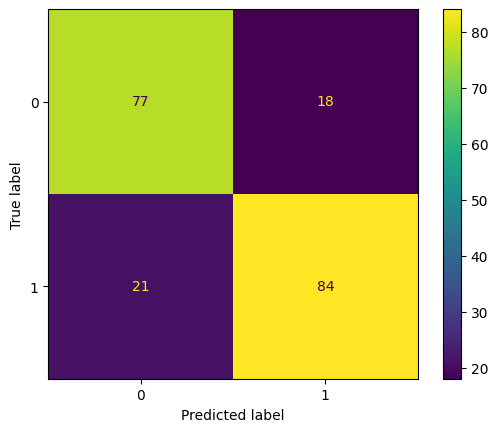

In [35]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [38]:
import pickle

In [40]:
with open('model.pkl', 'wb') as file2:
    pickle.dump(model,file2)

In [41]:
with open('model.pkl' , 'rb') as file4:  
    m= pickle.load(file4)